# LeetCode

## Link

1. https://leetcode.com/

2. https://leetcode-cn.com/

## Demo

1. https://www.onlinegdb.com/

## Details

LeetCode: 240, 347, 374

# LeetCode 240. Search a 2D Matrix II 搜索二维矩阵 II

Write an efficient algorithm that searches for a value target in an m x n integer matrix matrix. This matrix has the following properties:

- Integers in each row are sorted in ascending from left to right.

- Integers in each column are sorted in ascending from top to bottom.

编写一个高效的算法来搜索 m x n 矩阵 matrix 中的一个目标值 target 。该矩阵具有以下特性：

- 每行的元素从左到右升序排列。

- 每列的元素从上到下升序排列。

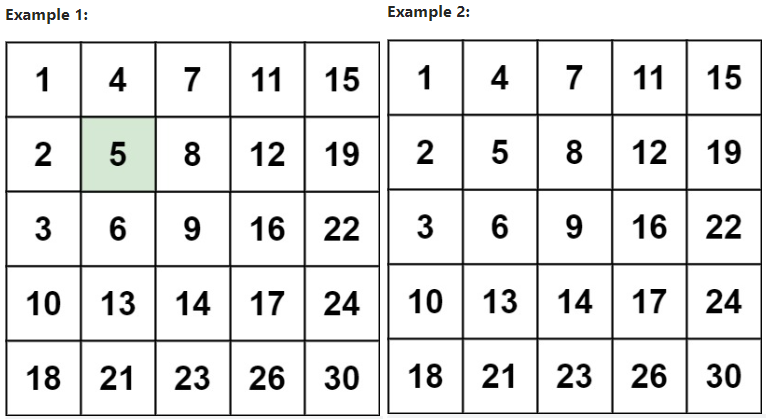

Example 1:

```
Input: matrix = [[1,4,7,11,15],[2,5,8,12,19],[3,6,9,16,22],[10,13,14,17,24],[18,21,23,26,30]], target = 5
Output: true
```

Example 2:

```
Input: matrix = [[1,4,7,11,15],[2,5,8,12,19],[3,6,9,16,22],[10,13,14,17,24],[18,21,23,26,30]], target = 20
Output: false
```


Constraints:

- m == matrix.length
- n == matrix[i].length
- 1 <= n, m <= 300
- $-10^{9} <= matrix[i][j] <= 10^{9}$
- All the integers in each row are sorted in ascending order.
- All the integers in each column are sorted in ascending order.
- $-10^{9} <= target <= 10^{9}$


In [1]:
class Solution:
    def searchMatrix(self, matrix, target):
        """
        :type matrix: List[List[int]]
        :type target: int
        :rtype: bool
        """
        m = len(matrix)
        if m == 0:
            return False
        n = len(matrix[0])
        if n == 0:
            return False

        i = m - 1
        j = 0
        while i >= 0 and j < n:
            if matrix[i][j] == target:
                return True
            elif matrix[i][j] < target:
                j = j + 1
            else:
                i = i - 1
        return False

# LeetCode 347. Top K Frequent Elements 前 K 个高频元素

Given an integer array nums and an integer k, return the k most frequent elements. You may return the answer in any order.

给你一个整数数组 nums 和一个整数 k ，请你返回其中出现频率前 k 高的元素。你可以按 任意顺序 返回答案。

Example 1:

```
Input: nums = [1,1,1,2,2,3], k = 2
Output: [1,2]
```

Example 2:

```
Input: nums = [1], k = 1
Output: [1]
```


Constraints:

- $1 <= nums.length <= 10^{5}$

- k is in the range [1, the number of unique elements in the array].

- It is guaranteed that the answer is unique.


In [2]:
from typing import List 
#时间复杂度：O(nlogk)
#空间复杂度：O(n)
import heapq
class Solution:
    def topKFrequent(self, nums: List[int], k: int) -> List[int]:
        #要统计元素出现频率
        map_ = {} #nums[i]:对应出现的次数
        for i in range(len(nums)):
            map_[nums[i]] = map_.get(nums[i], 0) + 1
        
        #对频率排序
        #定义一个小顶堆，大小为 k
        pri_que = [] #小顶堆
        
        #用固定大小为 k 的小顶堆，扫面所有频率的数值
        for key, freq in map_.items():
            heapq.heappush(pri_que, (freq, key))
            if len(pri_que) > k: #如果堆的大小大于了K，则队列弹出，保证堆的大小一直为k
                heapq.heappop(pri_que)
        
        #找出前 K 个高频元素，因为小顶堆先弹出的是最小的，所以倒叙来输出到数组
        result = [0] * k
        for i in range(k-1, -1, -1):
            result[i] = heapq.heappop(pri_que)[1]
        return result

# LeetCode 374. Guess Number Higher or Lower 二叉树的所有路径

We are playing the Guess Game. The game is as follows:

I pick a number from 1 to n. You have to guess which number I picked.

Every time you guess wrong, I will tell you whether the number I picked is higher or lower than your guess.

You call a pre-defined API int guess(int num), which returns three possible results:

- -1: Your guess is higher than the number I picked (i.e. num > pick).

- 1: Your guess is lower than the number I picked (i.e. num < pick).

- 0: your guess is equal to the number I picked (i.e. num == pick).

Return the number that I picked.

猜数字游戏的规则如下：

每轮游戏，我都会从 1 到 n 随机选择一个数字。 请你猜选出的是哪个数字。
如果你猜错了，我会告诉你，你猜测的数字比我选出的数字是大了还是小了。
你可以通过调用一个预先定义好的接口 int guess(int num) 来获取猜测结果，返回值一共有 3 种可能的情况（-1，1 或 0）：

-1：我选出的数字比你猜的数字小 pick < num
1：我选出的数字比你猜的数字大 pick > num
0：我选出的数字和你猜的数字一样。恭喜！你猜对了！pick == num

返回我选出的数字。

Example 1:

```
Input: n = 10, pick = 6
Output: 6
```

Example 2:

```
Input: n = 1, pick = 1
Output: 1
```

Example 3:

```
Input: n = 2, pick = 1
Output: 1
```

Constraints:

- 1 <= n <= $2^31$ - 1

- 1 <= pick <= n


In [3]:
class Solution:
    def guessNumber(self, n: int) -> int:
        left ,right = 1,n
        while left <= right:
            mid = (left + right) // 2
            if guess(mid) == 1:
                left = mid + 1
            elif guess(mid) == -1:
                right = mid - 1
            else :
                return mid